
# Classification with KNN, Logistic Regression, and Decision Tree

In this notebook, we will use the mobile-price-classification dataset to demonstrate the application of three different classifiers:
1. K-Nearest Neighbors (KNN)
2. Logistic Regression
3. Decision Tree

We will go through the following steps:
1. Data Loading and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Train-Test Split
4. K-Nearest Neighbors (KNN)
5. Logistic Regression
6. Decision Tree
7. Conclusion


# **1. Data Loading and Preprocessing**

In [86]:

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

# Display the first few rows of the dataframe
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [76]:

# Check for missing values
df.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [77]:

# Summary statistics
df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# **2. Exploratory Data Analysis (EDA)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

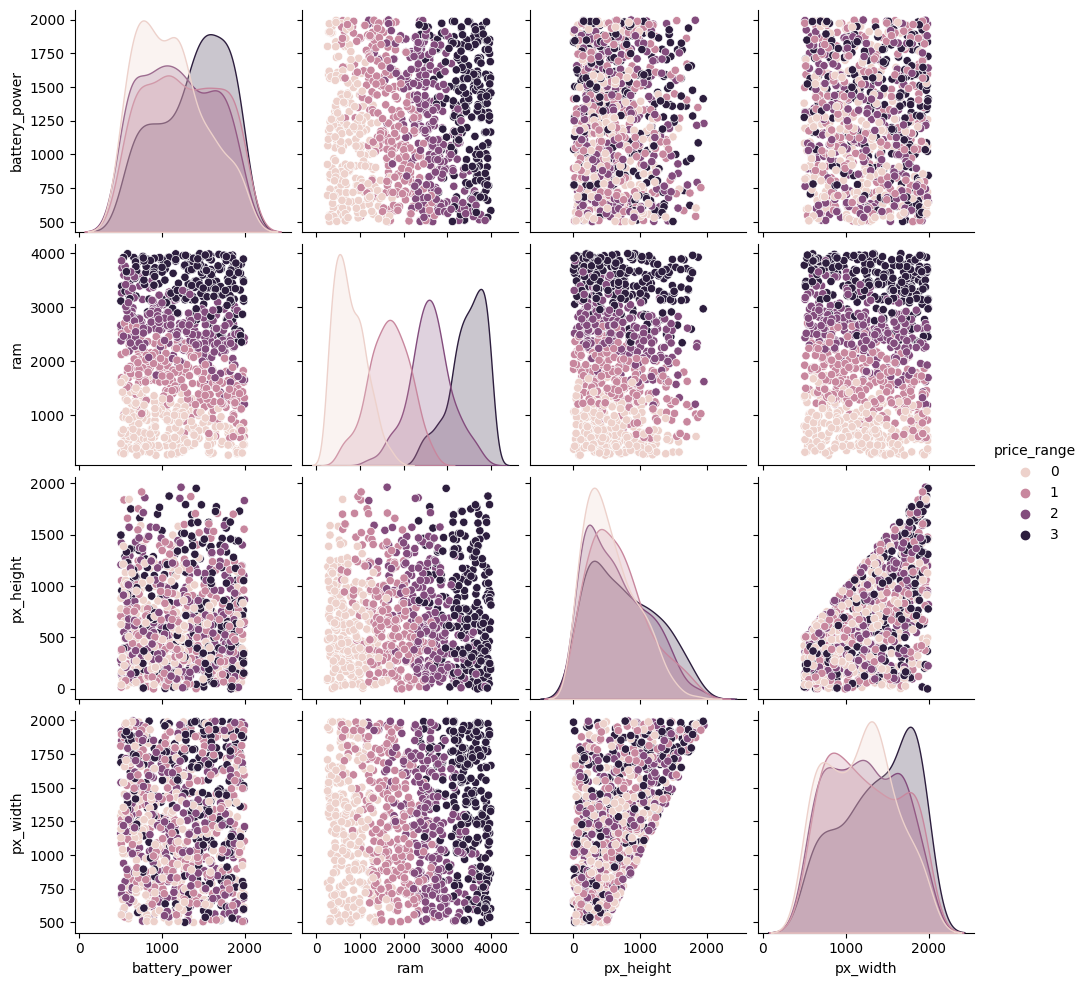

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Sample the dataset if it's too large (e.g., take a random sample of 1000 rows)
if len(df) > 1000:
    df = df.sample(1000, random_state=42)

# Select a subset of variables to plot
selected_vars = ['battery_power', 'ram', 'px_height', 'px_width', 'price_range']

# Pairplot
sns.pairplot(df[selected_vars], hue='price_range')
plt.show()


# **3. Train-Test Split**

In [83]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **4. K-Nearest Neighbors (KNN)**


In [80]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'KNN Classification Report:\n{classification_report(y_test, y_pred_knn)}')
print(f'KNN Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}')


KNN Accuracy: 0.9
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        51
           1       0.84      0.89      0.87        47
           2       0.91      0.84      0.87        57
           3       0.95      0.89      0.92        45

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

KNN Confusion Matrix:
[[50  1  0  0]
 [ 5 42  0  0]
 [ 0  7 48  2]
 [ 0  0  5 40]]



# **5. Logistic Regression**


In [81]:

from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Logistic Regression Classification:\n {classification_report(y_test, y_pred_log_reg)}')
print(f'Logistic Regression Confusion Matrix:\n {confusion_matrix(y_test, y_pred_log_reg)}')


Logistic Regression Accuracy: 0.705
Logistic Regression Classification:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.65      0.66      0.65        47
           2       0.60      0.54      0.57        57
           3       0.70      0.71      0.70        45

    accuracy                           0.70       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.70      0.70      0.70       200

Logistic Regression Confusion Matrix:
 [[47  4  0  0]
 [ 7 31  8  1]
 [ 0 13 31 13]
 [ 0  0 13 32]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **6. Decision Tree**


In [82]:

from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate the model
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_decision_tree)}')
print(f'Decision Tree Classification:\n {classification_report(y_test, y_pred_decision_tree)}')
print(f'Decision Tree Confusion Matrix: \n{confusion_matrix(y_test, y_pred_decision_tree)}')


Decision Tree Accuracy: 0.785
Decision Tree Classification:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.65      0.70      0.67        47
           2       0.77      0.70      0.73        57
           3       0.87      0.89      0.88        45

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

Decision Tree Confusion Matrix: 
[[44  7  0  0]
 [ 7 33  7  0]
 [ 0 11 40  6]
 [ 0  0  5 40]]



# **7. Conclusion**

In this notebook, we applied three different classifiers to the mobile-price-classification dataset and evaluated their performance:
1. K-Nearest Neighbors (KNN)
2. Logistic Regression
3. Decision Tree

Each classifier has its own strengths and weaknesses. The choice of classifier depends on the specific requirements and constraints of the task at hand.
